In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Анализ транзакций. Сводные таблицы

In [26]:
file = 'C:/Users/mi/Downloads/my_files/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-fazylova-17/Lesson_5/transaction_data_updated.csv'

In [27]:
transaction = pd.read_csv(file, parse_dates=['date'])

**Описание данных**

`date` – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05) <br>
`name` – имя пользователя<br>
`transaction` – статус транзакции<br>
`minute*` – сколько минут прошло с начала дня

In [28]:
transaction.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


**Проверка данных на ошибки**

In [31]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
 3   minute       5315 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 166.2+ KB


In [32]:
transaction.shape

(5315, 4)

In [35]:
transaction.describe()

,minute
count,5315.000000
mean,24.622389
std,16.649462
min,0.000000
25%,11.000000
50%,22.000000
75%,37.000000
max,59.000000


In [38]:
transaction.duplicated().sum()

0

**Вывод** <br>
Таблица содержит данные о 5315 транзакций. Пропущенных значений и дубликатов нет

### Статусы транзакций

In [45]:
bapp=transaction.groupby(['transaction'], as_index=False)\
    .agg({'name':'count'})\
    .rename(columns={'name':'count'})\
    .sort_values('count', ascending=False)
bapp

,transaction,count
2,successfull,3692
0,cancelled,1619
1,error,4


<AxesSubplot:xlabel='transaction', ylabel='count'>

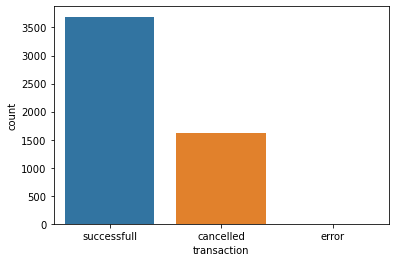

In [44]:
sns.barplot(x='transaction', y='count', data=bapp)

**Вывод** <br>
На данном барплоте плохо видно число наблюдений у некоторых значений (транзакции с ошибкой), их всего 4. Также мы видим, что доля отмененных транзакций состав почти 30% от всех транзакций

### Сколько транзакций осуществил каждый из пользователей
*Осуществлёнными считаются транзакции со значением successfull*

In [51]:
transaction_client = transaction.query("transaction == 'successfull'")\
    .groupby('name',as_index=False)\
    .agg({'transaction':'count'})\
    .sort_values('transaction', ascending=False)

transaction_client.head()

,name,transaction
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78


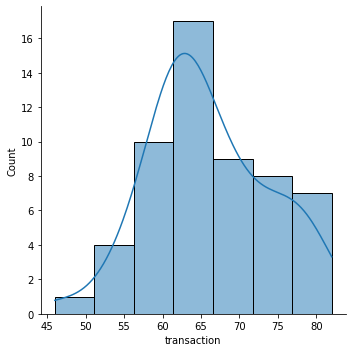

In [60]:
ax=sns.displot(transaction_client.transaction, kde=True)

In [61]:
transaction_client.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


**Вывод** <br>
- Пользователи в среднем совершили примерно по 66 транзакций
- Максимальное число транзакций – 82
- Минимальное число транзакций - 46
- Примерно 25% пользователей совершили менее 61 транзакции

### Сводная таблица

In [64]:
user_vs_minute_pivot=transaction.groupby(['name','minute'], as_index=False)\
    .agg({'transaction':'count'})\
    .pivot(index='minute', columns='name', values='transaction')\
    .fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


### Проверим, насколько правильно было переведено время в минуты

In [71]:
transaction['true_minute'] = transaction.date.dt.minute + (transaction.date.dt.hour * 60)

In [72]:
transaction

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [74]:
transaction.query("minute != true_minute").shape[0]

1668

**Вывод** <br>
Присутствовала ошибка в переводе в минуты (в итоге, у 1668 транзакций минуты были записаны неправильно). Меняем на верные и актуализируем сводную таблицу

In [75]:
user_vs_minute_pivot_1=transaction.groupby(['name','true_minute'], as_index=False)\
    .agg({'transaction':'count'})\
    .pivot(index='true_minute', columns='name', values='transaction')\
    .fillna(0)
user_vs_minute_pivot_1.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
true_minute,,,,,,,,,,,,,,,,,,,,,
0,1.0,3.0,0.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0
1,1.0,4.0,0.0,3.0,2.0,1.0,3.0,1.0,2.0,0.0,...,2.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
2,1.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,...,2.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0
3,2.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,2.0,2.0,0.0,4.0,0.0,1.0,2.0,1.0,0.0
4,2.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0
